### Decision-Tree terminology

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

![title](criterion.png)

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
df = pd.read_csv('car_evaluation.csv')

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
X = df.drop(['class'], axis=1)
y = df['class']

In [46]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [11]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [12]:
X_train

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1
...,...,...,...,...,...,...
1130,3,3,2,2,3,1
1294,3,4,1,2,3,3
860,2,4,1,2,3,1
1459,4,2,3,1,2,3


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DecisionTreeRegressor()

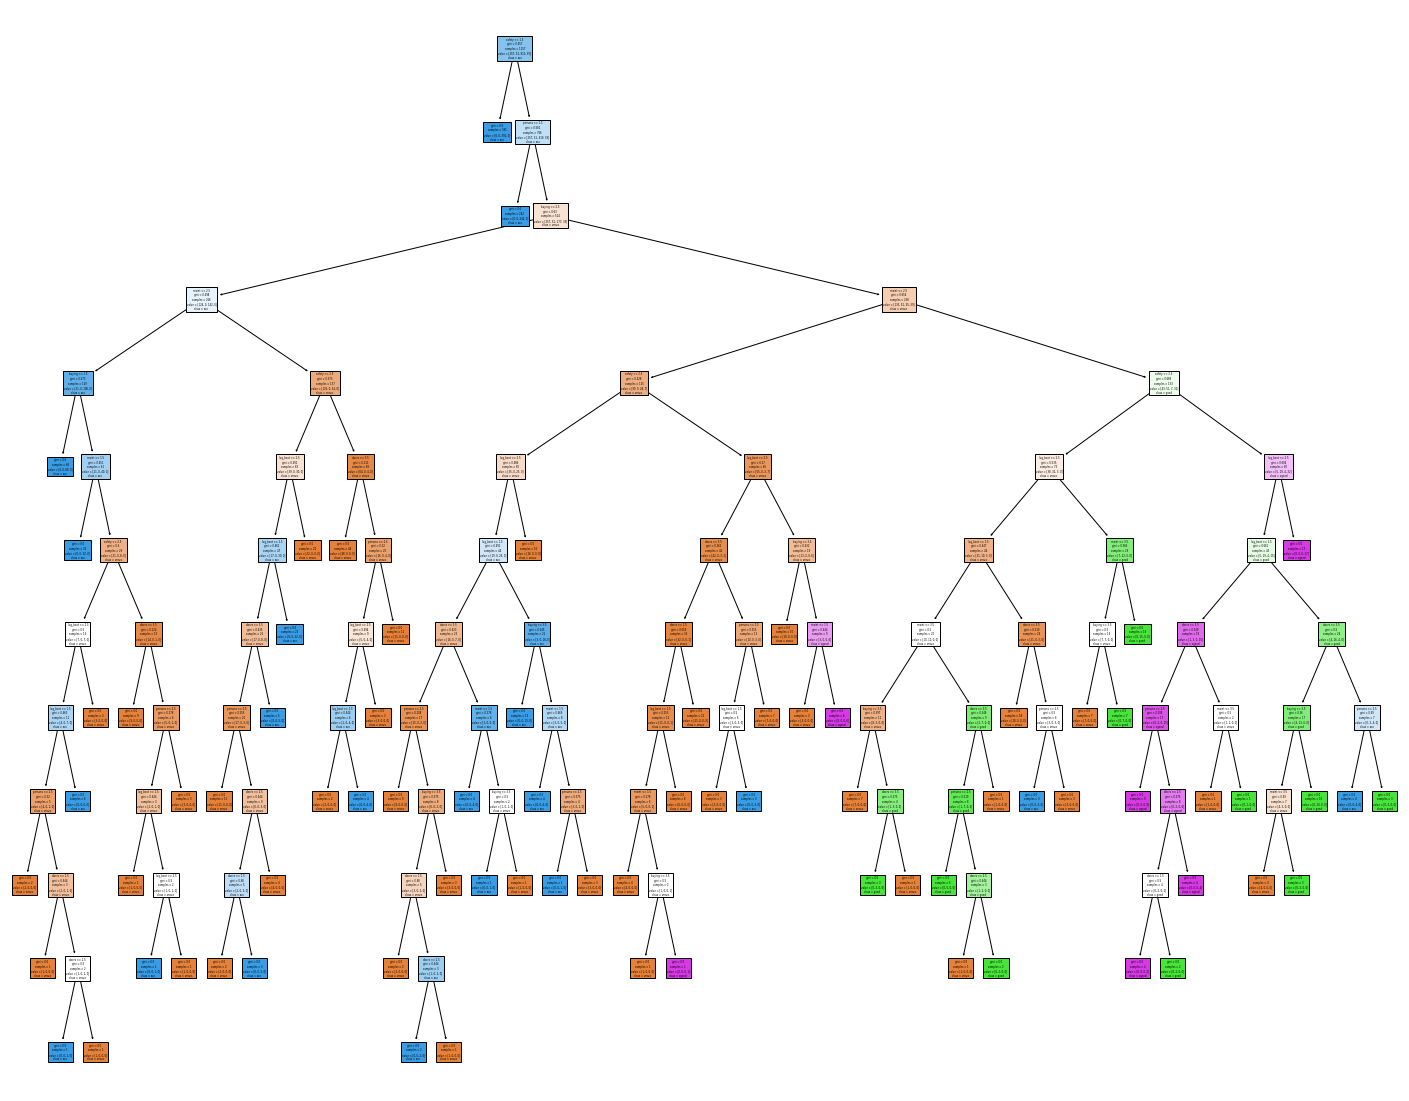

In [71]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   feature_names=X_train.columns,  
                   class_names=y_train.unique(),
                   filled=True)

In [72]:
y_pred_gini = clf_gini.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9719


In [74]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [75]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


In [76]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9719


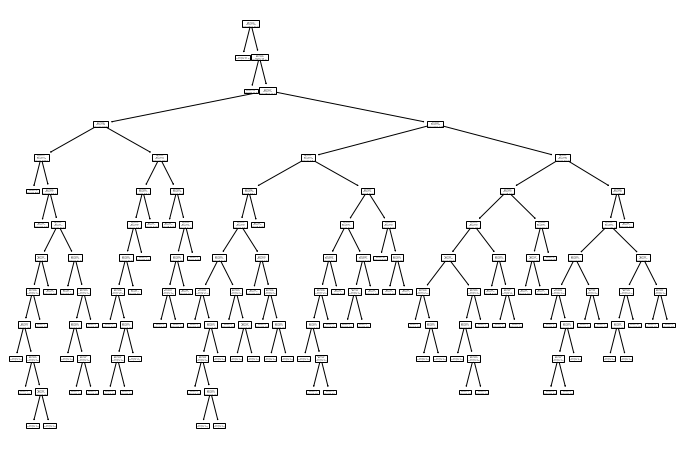

In [77]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train));

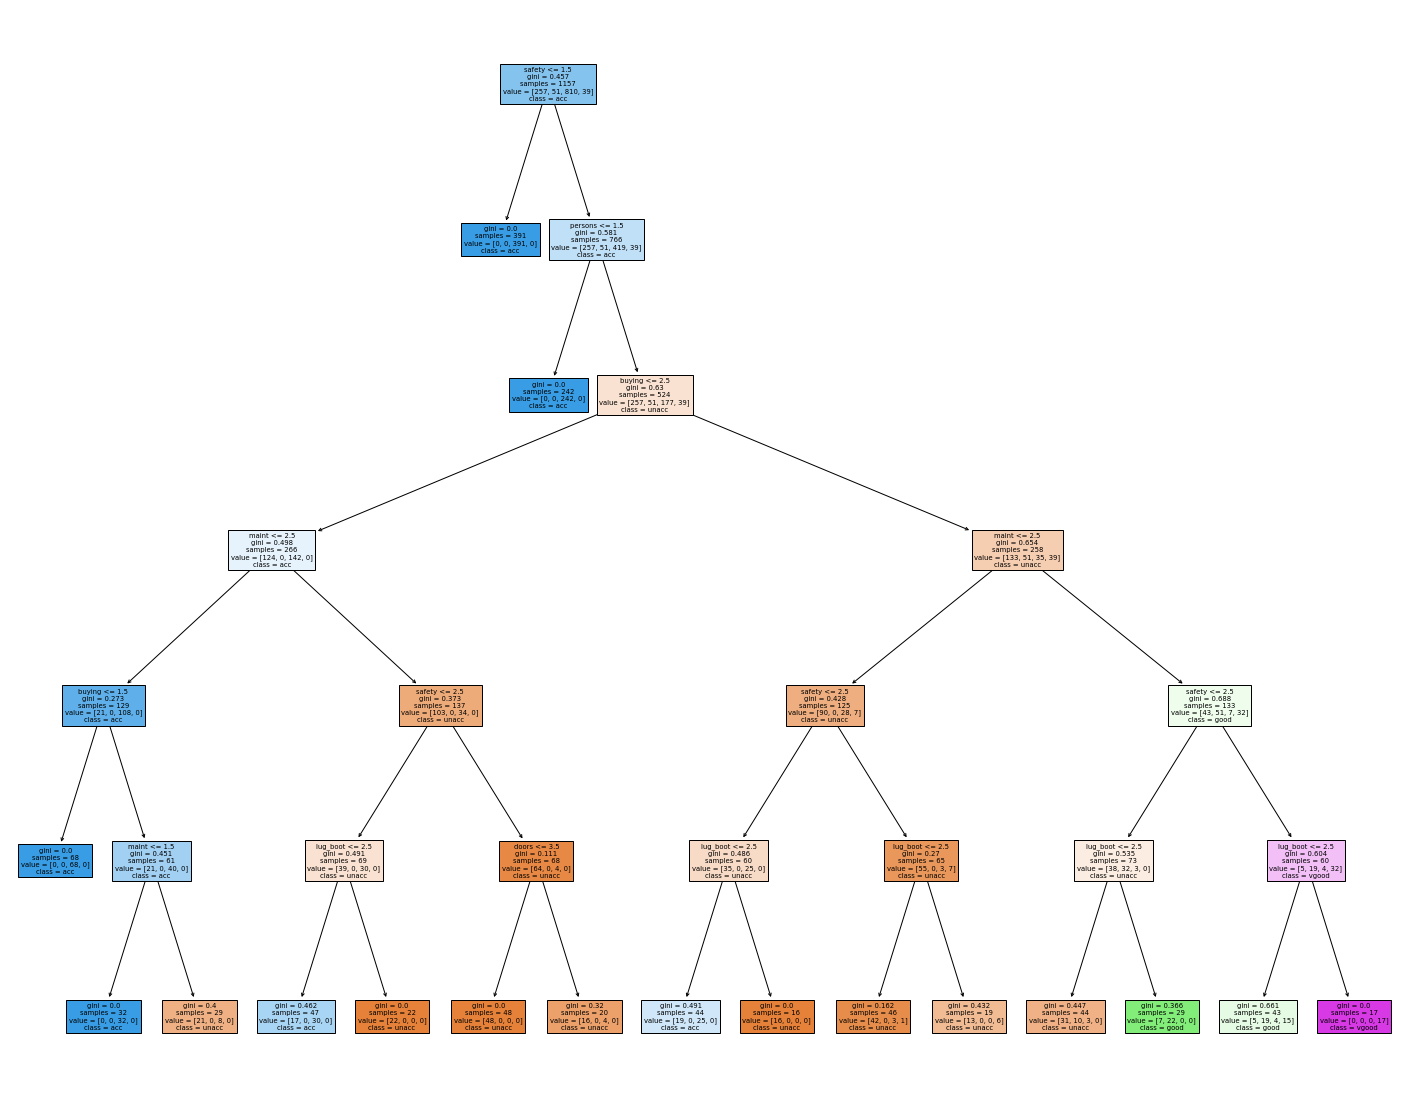

In [64]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   feature_names=X_train.columns,  
                   class_names=y_train.unique(),
                   filled=True)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf_gini.predict(X_test)))

              precision    recall  f1-score   support

         acc       0.86      0.84      0.85       127
        good       0.54      0.72      0.62        18
       unacc       0.97      0.98      0.98       399
       vgood       1.00      0.58      0.73        26

    accuracy                           0.93       570
   macro avg       0.84      0.78      0.79       570
weighted avg       0.93      0.93      0.93       570

